# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 10</center></span>

### Exercise 10.1

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

### Exercise 10.2

Apply your code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

Do you improve with respect using one single Continent?

Do you improve with respect using (up to) 10 independent Continents?

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
import seaborn as sns

## US capitals - 1 core

population:	1000
crossover prob:	0.8
mutation prob:	0.25
cost:	4613.1


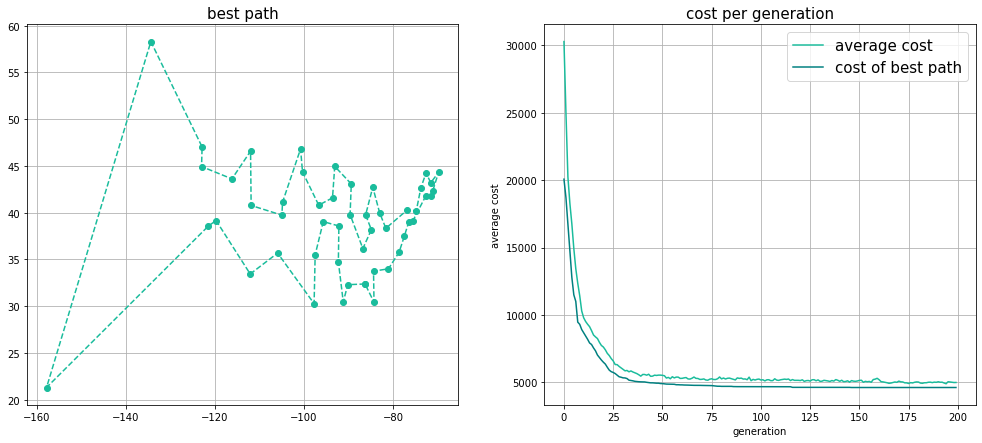

In [2]:
index, x_small, y_small = np.loadtxt("best_paths_1core/p1000c8m25.dat", unpack=True, usecols=(0,1,2), delimiter=",")
step, cost = np.loadtxt("average_fits_1core/p1000c8m25.dat", unpack=True, usecols=(0,1), delimiter=",")
step, cost_best = np.loadtxt("average_fits_1core/best_fit_US.dat", unpack=True, usecols=(0,1), delimiter=",")
x_small = np.append(x_small, x_small[0])
y_small = np.append(y_small,y_small[0])

fig, ax  = plt.subplots(1, 2, figsize=(17 , 7))
ax[0].set_title("best path", fontsize=15)
ax[0].plot(x_small,y_small, linestyle="--",marker="o", color="#1ABC9C")
ax[0].grid()

ax[1].set_title("cost per generation", fontsize=15)
ax[1].grid()
ax[1].set_xlabel("generation")
ax[1].set_ylabel("average cost")
ax[1].plot(step[:200],cost[:200], color="#1ABC9C", label="average cost")
ax[1].plot(step[:200],cost_best[:200], color="teal", label="cost of best path")
ax[1].legend(prop={'size': 15})
print("population:\t1000\ncrossover prob:\t0.8\nmutation prob:\t0.25\ncost:\t4613.1")

I grafici riportano il percorso migliore trovato dall'algoritmo con 1 singolo core e il paragone tra l'evoluzione del costo medio della metà migliore dei percorsi esplorati con l'evoluzione del costo del miglior percorso.

Come ci si aspetta, il costo del percorso migliore è sempre inferiore al costo medio.

## statistica del singolo core

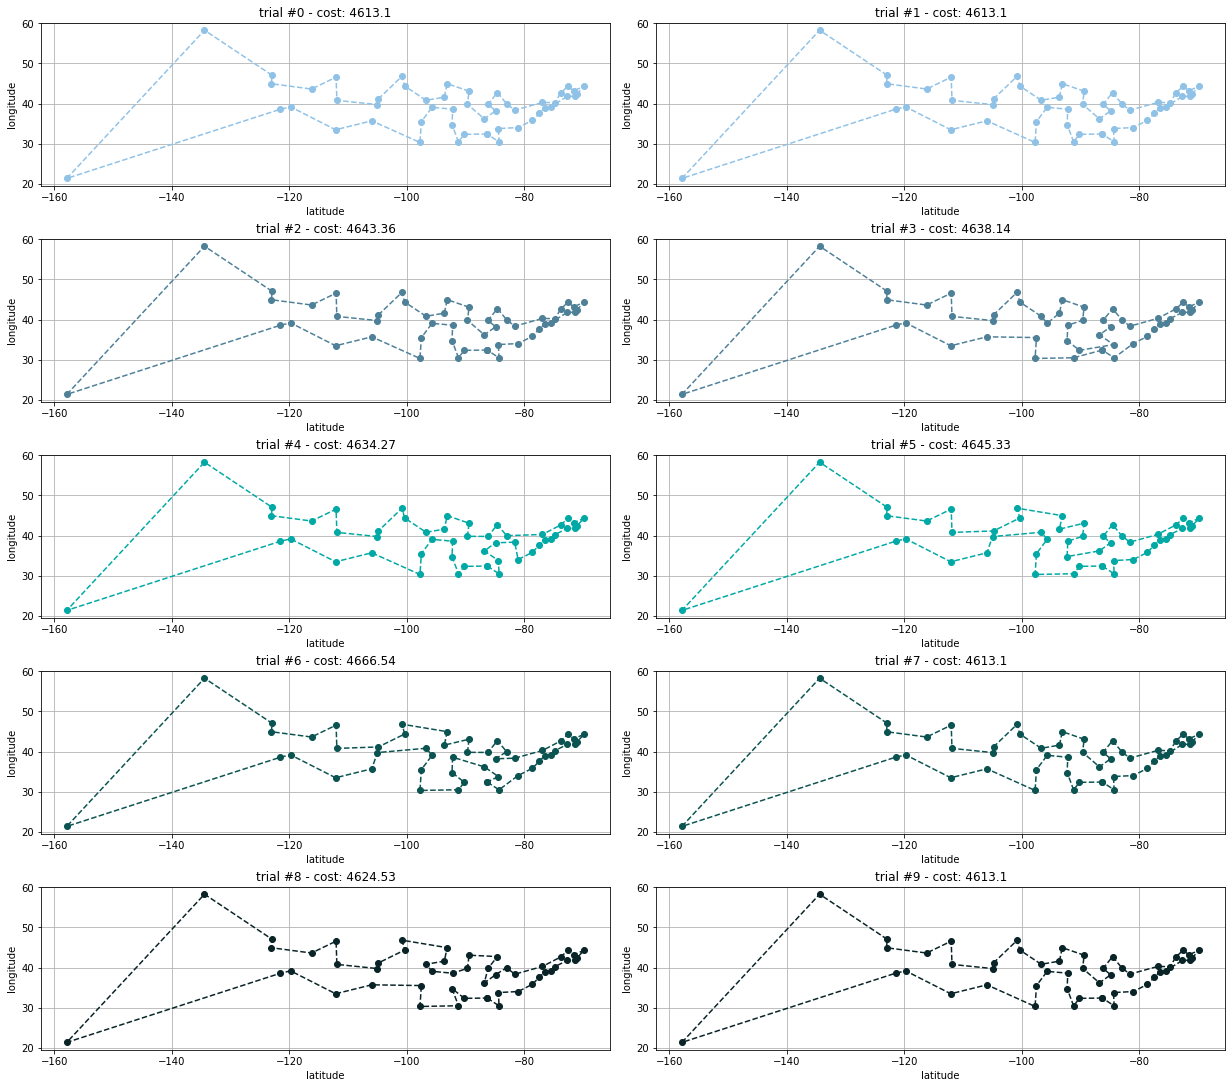

In [3]:
index0, x0, y0 = np.loadtxt("silent_rank_paths/best_chromo0.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x0 = np.append(x0, x0[0])
y0 = np.append(y0, y0[0])
index1, x1, y1 = np.loadtxt("silent_rank_paths/best_chromo1.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x1 = np.append(x1, x1[0])
y1 = np.append(y1, y1[0])
index2, x2, y2 = np.loadtxt("silent_rank_paths/best_chromo2.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x2 = np.append(x0, x0[0])
y2 = np.append(y0, y0[0])
index3, x3, y3 = np.loadtxt("silent_rank_paths/best_chromo3.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x3 = np.append(x3, x3[0])
y3 = np.append(y3, y3[0])
index4, x4, y4 = np.loadtxt("silent_rank_paths/best_chromo4.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x4 = np.append(x4, x4[0])
y4 = np.append(y4, y4[0])
index5, x5, y5 = np.loadtxt("silent_rank_paths/best_chromo5.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x5 = np.append(x5, x5[0])
y5 = np.append(y5, y5[0])
index6, x6, y6 = np.loadtxt("silent_rank_paths/best_chromo6.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x6 = np.append(x6, x6[0])
y6 = np.append(y6, y6[0])
index7, x7, y7 = np.loadtxt("silent_rank_paths/best_chromo7.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x7 = np.append(x7, x7[0])
y7 = np.append(y7, y7[0])
index8, x8, y8 = np.loadtxt("silent_rank_paths/best_chromo8.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x8 = np.append(x8, x8[0])
y8 = np.append(y8, y8[0])
index9, x9, y9 = np.loadtxt("silent_rank_paths/best_chromo9.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x9 = np.append(x9, x9[0])
y9 = np.append(y9, y9[0])

costs = [4613.1, 4613.1, 4643.36, 4638.14, 4634.27, 4645.33, 4666.54, 4613.1, 4624.53, 4613.1]

fig, ax  = plt.subplots(5, 2, figsize=(17, 15), constrained_layout = True)

ax[0,0].plot(x0,y0, linestyle="--", marker="o", color = "#90C2E7")
ax[0,1].plot(x1,y1, linestyle="--", marker="o", color = "#90C2E7")
ax[1,0].plot(x2,y2, linestyle="--", marker="o", color = "#4E8098")
ax[1,1].plot(x3,y3, linestyle="--", marker="o", color = "#4E8098")
ax[2,0].plot(x4,y4, linestyle="--", marker="o", color = "#00A9A5")
ax[2,1].plot(x5,y5, linestyle="--", marker="o", color = "#00A9A5")
ax[3,0].plot(x6,y6, linestyle="--", marker="o", color = "#0B5351")
ax[3,1].plot(x7,y7, linestyle="--", marker="o", color = "#0B5351")
ax[4,0].plot(x8,y8, linestyle="--", marker="o", color = "#092327")
ax[4,1].plot(x9,y9, linestyle="--", marker="o", color = "#092327")
for i in range (2):
    for j in range (5):
        ax[j,i].grid()
        ax[j,i].set_xlabel("latitude", fontsize=10)
        ax[j,i].set_ylabel("longitude", fontsize=10)
        ax[j,i].set_title("trial #" + str(2*j+i) + " - cost: " + str(costs[2*j+i]))

I grafici riportano la statistica dell'algoritmo a core singolo: come si può vedere, solo quattro dei dieci processi convergono al migliore minimo trovato.

Un risultato del genere è aspettato: poichè l'evoluzione è una random search, l'algoritmo esplora lo spazio dei possibili percorsi in maniera casuale e arriva con probabilità diverse ai minimi (locali) dello spazio.

## US capitals - 4 cores

In [4]:
print("population:\t1000\ncrossover prob:\t0.8\nmutation prob:\t0.3\ncost:\t\t4598.32 per tutti")

population:	1000
crossover prob:	0.8
mutation prob:	0.3
cost:		4598.32 per tutti


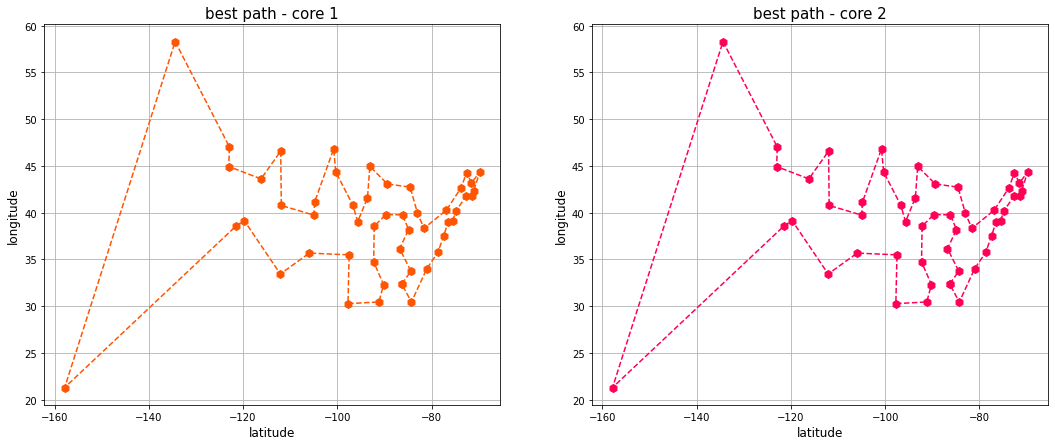

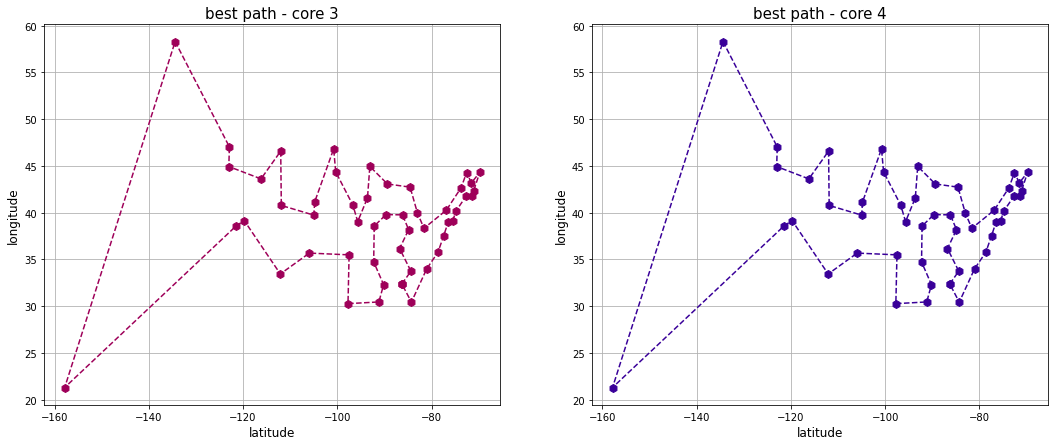

In [5]:
index0, x0, y0 = np.loadtxt("rank_paths/best_chromo0.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x0 = np.append(x0, x0[0])
y0 = np.append(y0, y0[0])
index1, x1, y1 = np.loadtxt("rank_paths/best_chromo1.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x1 = np.append(x1, x1[0])
y1 = np.append(y1, y1[0])
index2, x2, y2 = np.loadtxt("rank_paths/best_chromo0.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x2 = np.append(x0, x0[0])
y2 = np.append(y0, y0[0])
index3, x3, y3 = np.loadtxt("rank_paths/best_chromo1.dat", unpack=True, usecols=(0,1,2), delimiter=",")
x3 = np.append(x3, x3[0])
y3 = np.append(y3, y3[0])

fig, ax  = plt.subplots(1, 2, figsize=(18 , 7))
ax[0].set_title("best path - core 1", fontsize=15)
ax[0].plot(x0,y0, marker="h", linestyle="--", color="#FF5400", markersize=8)
ax[0].set_xlabel("latitude", fontsize=12)
ax[0].set_ylabel("longitude", fontsize=12)
ax[0].grid()

ax[1].set_title("best path - core 2", fontsize=15)
ax[1].plot(x1,y1, marker="h", linestyle="--", color="#FF0054", markersize=8)
ax[1].set_xlabel("latitude", fontsize=12)
ax[1].set_ylabel("longitude", fontsize=12)
ax[1].grid()

fig, axs  = plt.subplots(1, 2, figsize=(18 , 7))
axs[0].set_title("best path - core 3", fontsize=15)
axs[0].plot(x2,y2, marker="h", linestyle="--", color="#9E0059", markersize=8)
axs[0].set_xlabel("latitude", fontsize=12)
axs[0].set_ylabel("longitude", fontsize=12)
axs[0].grid()

axs[1].set_title("best path - core 4", fontsize=15)
axs[1].plot(x3,y3, marker="h", linestyle="--", color = "#390099", markersize=8)
axs[1].set_xlabel("latitude", fontsize=12)
axs[1].set_ylabel("longitude", fontsize=12)
axs[1].grid()

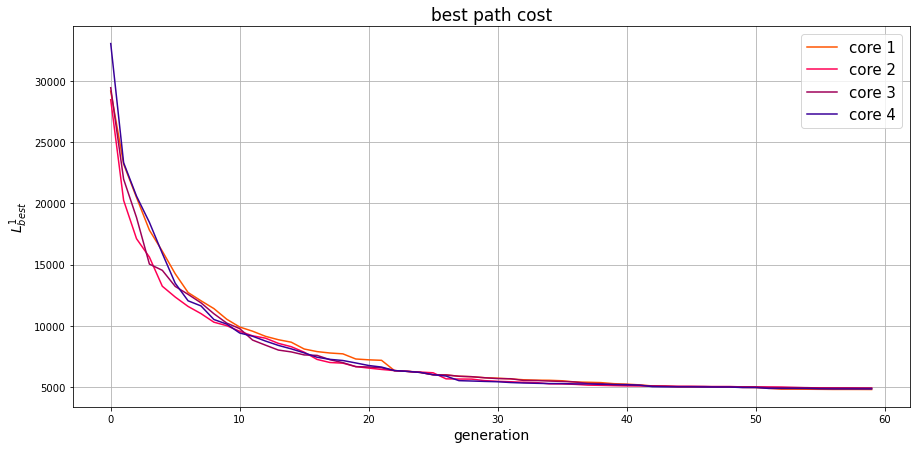

In [6]:
c0 = np.loadtxt("rank_costs/cost0.dat", unpack=True)
c1 = np.loadtxt("rank_costs/cost1.dat", unpack=True)
c2 = np.loadtxt("rank_costs/cost2.dat", unpack=True)
c3 = np.loadtxt("rank_costs/cost3.dat", unpack=True)
step = np.arange(0,201)

fig, ax  = plt.subplots(1,1,figsize=(15 , 7))
ax.plot(step[:60], c0[:60], color="#FF5400", label="core 1")
ax.plot(step[:60], c1[:60], color="#FF0054", label="core 2")
ax.plot(step[:60], c2[:60], color="#9E0059", label="core 3")
ax.plot(step[:60], c3[:60], color="#390099", label="core 4")
#ax.plot(step[:60], cost_best[:60], color="teal", label="single core")
ax.set_title("best path cost", fontsize=17)
ax.set_xlabel("generation", fontsize=14)
ax.set_ylabel(r"$L^1_{best}$", fontsize=14)
ax.grid()
ax.legend(prop={'size': 15})

I grafici mostrano il miglior percorso trovato per il Travelling Saleman Problem sulle 50 capitali degli USA e l'andamento del costo del miglior percorso lungo le generazioni.

L'algoritmo è stato parallelizzato con la libreria MPI e il percorso migliore trovato usando 4 core è, come aspettato, migliore del percorso trovato dal core singolo.

Utilizzando più di 4 core in parallelo ho notato che il risultato inizia ,però, a peggiorare: questo è probabilmente dovuto a come è stata implementata la migrazione dei migliori percorsi tra i diversi core. L'algoritmo, infatti, raccoglie gli $N_{send}$ migliori percorsi ogni $N_{migr}$ generazioni da tutti i core utilizzati e li spedisce a tutti a core (questo viene facilmente implementato con la funzione $MPI Allgather$): è possibile che questa comunicazione sia molto forte e faccia convergere velocemente l'algoritmo ad un minimo locale. Come si nota dalla statistica su core singolo, la maggioranza dei core converge ad un minimo locale: questo fa sì che ogni core lavori con tanti percorsi che sono tra i migliori della propria popolazione (e quindi hanno più probabilità di essere utilizzati per il crossover) ma che non corrispondono al minimo globale.

Per provare ad ovviare al problema ho provato a modificare i parametri $N_{send}$ e $N_{migr}$ in modo tale che i continenti si mandassero pochi percorsi in maniera poco frequente ma questo porta a core che si scambiano pochissime informazioni e quindi l'andamento di ogni core diventa simile a quello di continente isolato. 